## Question 1

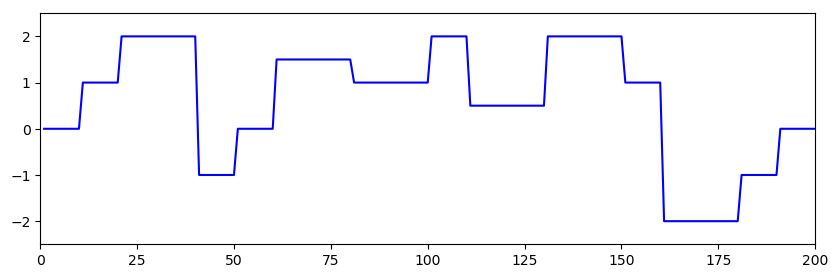

In [4]:
# Get data
using CSV

# import data set
raw = CSV.read("voltages.csv", datarow=1)

 # The "desired" signal
volt = raw[1:end,1];
time = collect(1:1:length(volt));

# plot our original data
using PyPlot
figure(figsize=(10,3))
plot(time,volt,"b-", markersize=10)
axis([0,200,-2.5,2.5]);

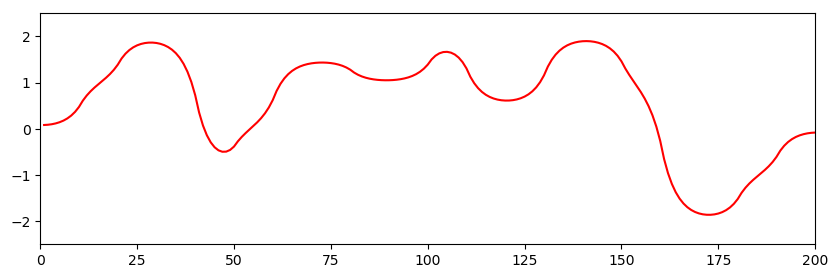

Academic license - for non-commercial use only
[0.0818665, 0.0873243, 0.0986037, 0.116457, 0.142073, 0.177162, 0.224061, 0.285897, 0.366794, 0.472143, 0.608968, 0.719725, 0.811796, 0.891321, 0.963601, 1.03345, 1.10554, 1.18466, 1.27608, 1.38592, 1.52148, 1.62514, 1.70381, 1.76274, 1.80585, 1.83601, 1.85524, 1.86482, 1.86539, 1.85699, 1.83905, 1.81038, 1.76908, 1.71237, 1.63649, 1.53638, 1.40536, 1.2347, 1.01301, 0.725528, 0.35308, 0.0708376, -0.140016, -0.293537, -0.399961, -0.466382, -0.497228, -0.494556, -0.458188, -0.3857, -0.272258, -0.176966, -0.0934721, -0.0162097, 0.059972, 0.140152, 0.229675, 0.33451, 0.461646, 0.619558, 0.818774, 0.972575, 1.09121, 1.1826, 1.25283, 1.30658, 1.34743, 1.37811, 1.40067, 1.41661, 1.42698, 1.43249, 1.43349, 1.43007, 1.42198, 1.40869, 1.38931, 1.36255, 1.32663, 1.27915, 1.21695, 1.16921, 1.13275, 1.10514, 1.08454, 1.06958, 1.05926, 1.05288, 1.05004, 1.05052, 1.05438, 1.06186, 1.07347, 1.08997, 1.11247, 1.14248, 1.18197, 1.2336, 1.30081, 1.38807, 1.5

In [8]:
using JuMP, Gurobi

#define our lambda value
λ = 15

#define model to solve
m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, v[1:length(volt)])

#define the objective. Large lmbda = smooth line, smaller lambda = identical to our original plot
@expression(m, mainObj, sum((v[i] - volt[i]).^2 for i in 1:length(volt)))
@expression(m, R, sum((v[i] - v[i - 1]).^2 for i in 2:length(volt)))


@objective(m, Min, mainObj + λ*R) # Minimize trade off

#solve
solve(m)

#i do not think we need to print the values, but i will keep it in just in case
print(getvalue(v))

#plot the function, creating our ideal line via least squares and smoothness
using PyPlot
figure(figsize=(10,3))
plot(time,getvalue(v),"r-", markersize=10)
axis([0,200,-2.5,2.5]);

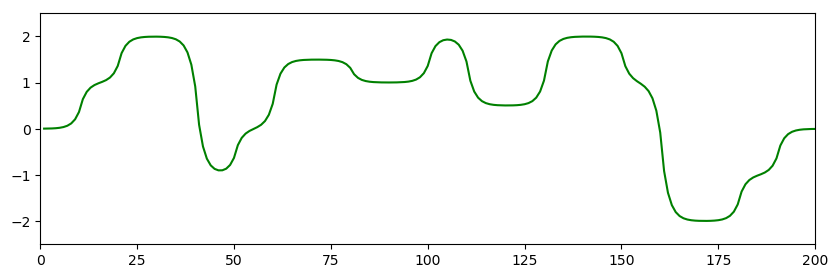

Academic license - for non-commercial use only
[0.00337005, 0.0044934, 0.00711455, 0.0121072, 0.0211356, 0.0372092, 0.0656859, 0.116058, 0.205116, 0.362546, 0.640824, 0.799377, 0.891056, 0.946421, 0.983926, 1.01607, 1.05358, 1.10894, 1.20062, 1.35917, 1.63744, 1.79486, 1.8839, 1.93423, 1.96265, 1.97862, 1.98745, 1.99211, 1.99414, 1.99421, 1.99235, 1.98795, 1.97953, 1.96428, 1.93712, 1.88901, 1.8039, 1.65343, 1.38743, 0.917238, 0.0861267, -0.382942, -0.646325, -0.791815, -0.867911, -0.899978, -0.898703, -0.863664, -0.783178, -0.630419, -0.354466, -0.196669, -0.104428, -0.0469967, -0.00523067, 0.0347918, 0.0864114, 0.166835, 0.30287, 0.539862, 0.956808, 1.19269, 1.32613, 1.40162, 1.44432, 1.46846, 1.48208, 1.48973, 1.49396, 1.49617, 1.4971, 1.49707, 1.49606, 1.49375, 1.48934, 1.48139, 1.46723, 1.44214, 1.39777, 1.31933, 1.18066, 1.10222, 1.05784, 1.03275, 1.01858, 1.01059, 1.00614, 1.00374, 1.00258, 1.00228, 1.00274, 1.00412, 1.00686, 1.0119, 1.0209, 1.03686, 1.06512, 1.11508, 1.20339, 1

In [9]:
using JuMP, Gurobi

# set lambda value
λ = 3

#define model to solve
m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, v[1:length(volt)])

#create expressions which will define our smoothness
@expression(m, mainObj, sum((v[i] - volt[i]).^2 for i in 1:length(volt)))
@expression(m, R, sum((v[i] - v[i - 1]).^2 for i in 2:length(volt)))

#define the objective. Large lmbda = smooth line, smaller lambda = identical to our original plot
@objective(m, Min, mainObj + λ*R) # Minimize trade off

#solve
solve(m)

#i do not think we need to print the values, but i will keep it in just in case
print(getvalue(v))


#plot the function, creating our ideal line via least squares and smoothness
using PyPlot
figure(figsize=(10,3))
plot(time,getvalue(v),"g-", markersize=10)
axis([0,200,-2.5,2.5]);

#### The trade off here is that the larger our λ is, the smoother our graph will become. So if we set λ to 100, the graph is nearly parallel to our X-axis. Where as, if we choose a really small λ, our graph becomes nearly identical to our original plot. This is what we are looking for.

In [ ]:
# getvalue(v) .- volt